<a href="https://colab.research.google.com/github/shrestha94sujan/stocks_analysis/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print('hello world of stocks!')

hello world of stocks!


**Installing yfinance api for importing the financial stuffs.**

In [0]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=24dbb0a13893da6475c42942d0b4bca0516a72154cd503672c38df1a6fdf93bb
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


**Adding import statements.**

In [0]:
import yfinance as yf

# Just get the AAPL stocks, cuz frankly that's all i am interested in, lol
aapl = yf.Ticker('AAPL')

#get historical market data
hist = aapl.history(period='30y')
hist.reset_index(inplace=True)

#if you wish to look at the entire historical data for last 30 years!
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1990-05-21,1.15,1.16,1.13,1.15,65620800,0.00393,0.0
1,1990-05-22,1.17,1.21,1.16,1.20,75272400,0.00000,0.0
2,1990-05-23,1.20,1.23,1.20,1.22,51878400,0.00000,0.0
3,1990-05-24,1.23,1.23,1.21,1.22,37032800,0.00000,0.0
4,1990-05-25,1.15,1.18,1.13,1.16,80830400,0.00000,0.0
...,...,...,...,...,...,...,...,...
7554,2020-05-14,304.51,309.79,301.53,309.54,39732300,0.00000,0.0
7555,2020-05-15,300.35,307.90,300.21,307.71,41587100,0.00000,0.0
7556,2020-05-18,313.17,316.50,310.32,314.96,33843100,0.00000,0.0
7557,2020-05-19,315.03,318.52,313.01,313.14,25343600,0.00000,0.0


**Historical charts that shows opening and closing stock prices.**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



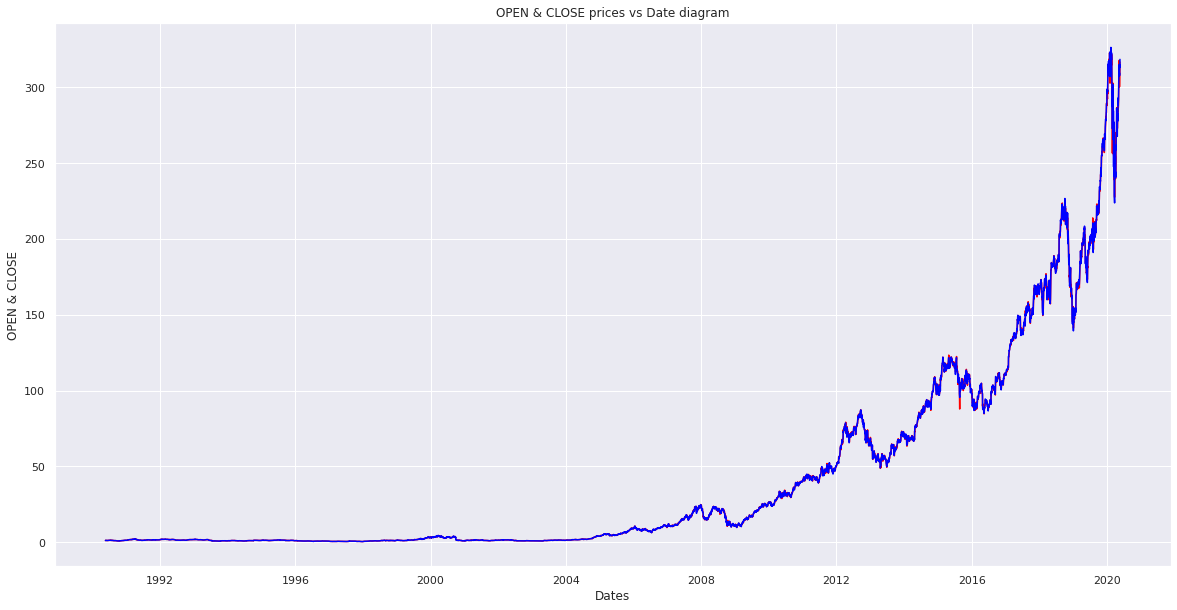

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns; sns.set()
from matplotlib.ticker import FixedFormatter, FixedLocator
%matplotlib inline

#Plot Open and Close prices.
plt.figure(figsize=(20, 10))
plt.plot(hist['Date'], hist['Open'], color='red')
plt.plot(hist['Date'], hist['Close'], color='blue')
plt.xlabel('Dates')
plt.ylabel('OPEN & CLOSE')
plt.title('OPEN & CLOSE prices vs Date diagram')
plt.show()


As we can see, the chart really doesn't help us draw a good understanding of the stock except show an increasing trend! We basically only know that the prices of apple stock is continually going up with occasional bumps along the way. That's where the Data modeling and clustering comes in. 

**Modeling our stock price data to meet requirements.**

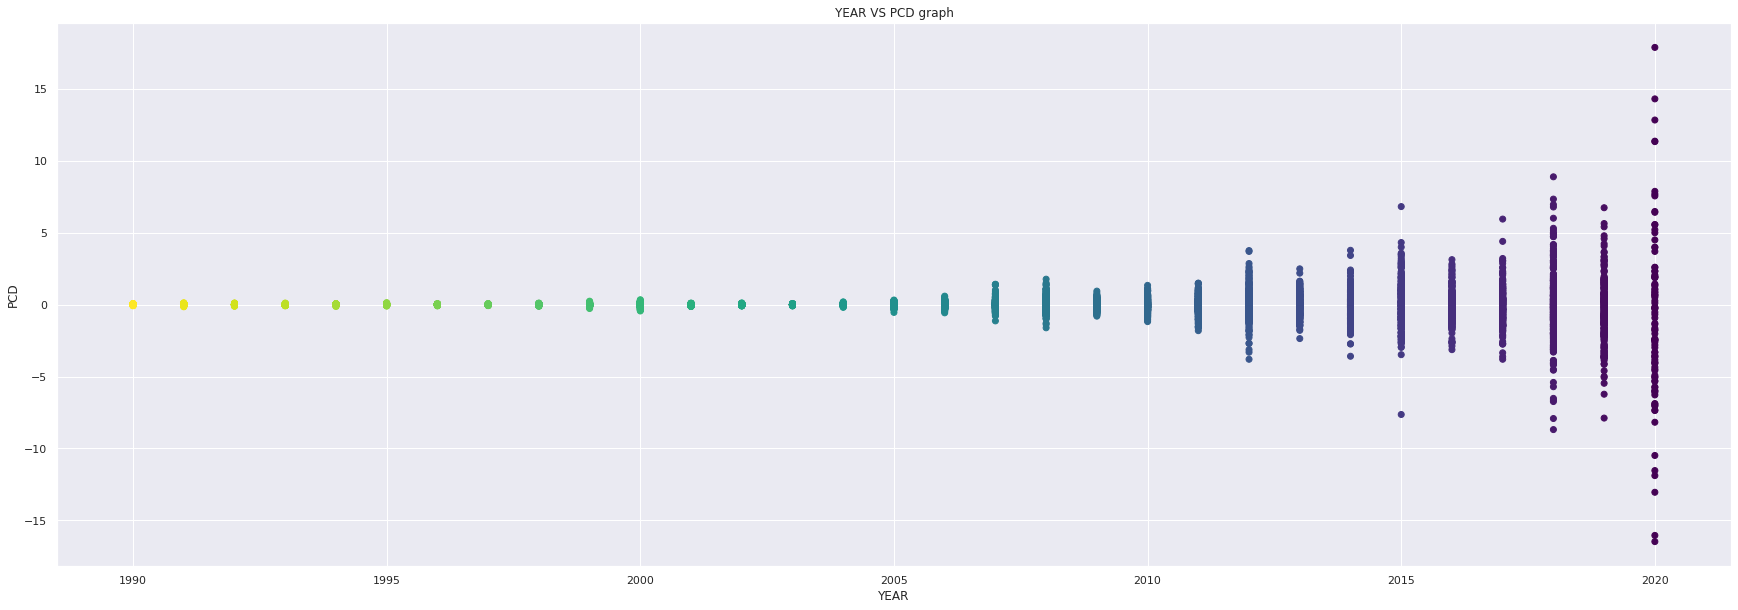

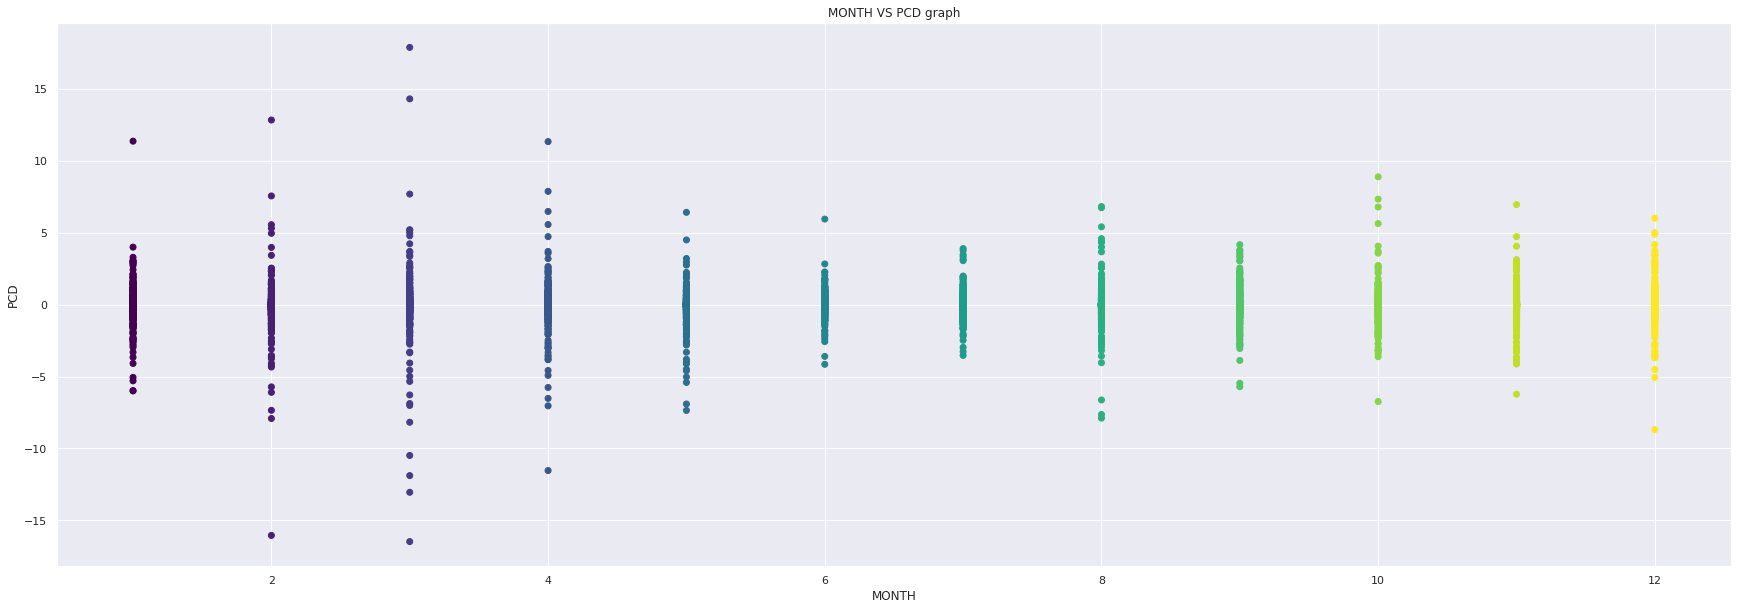

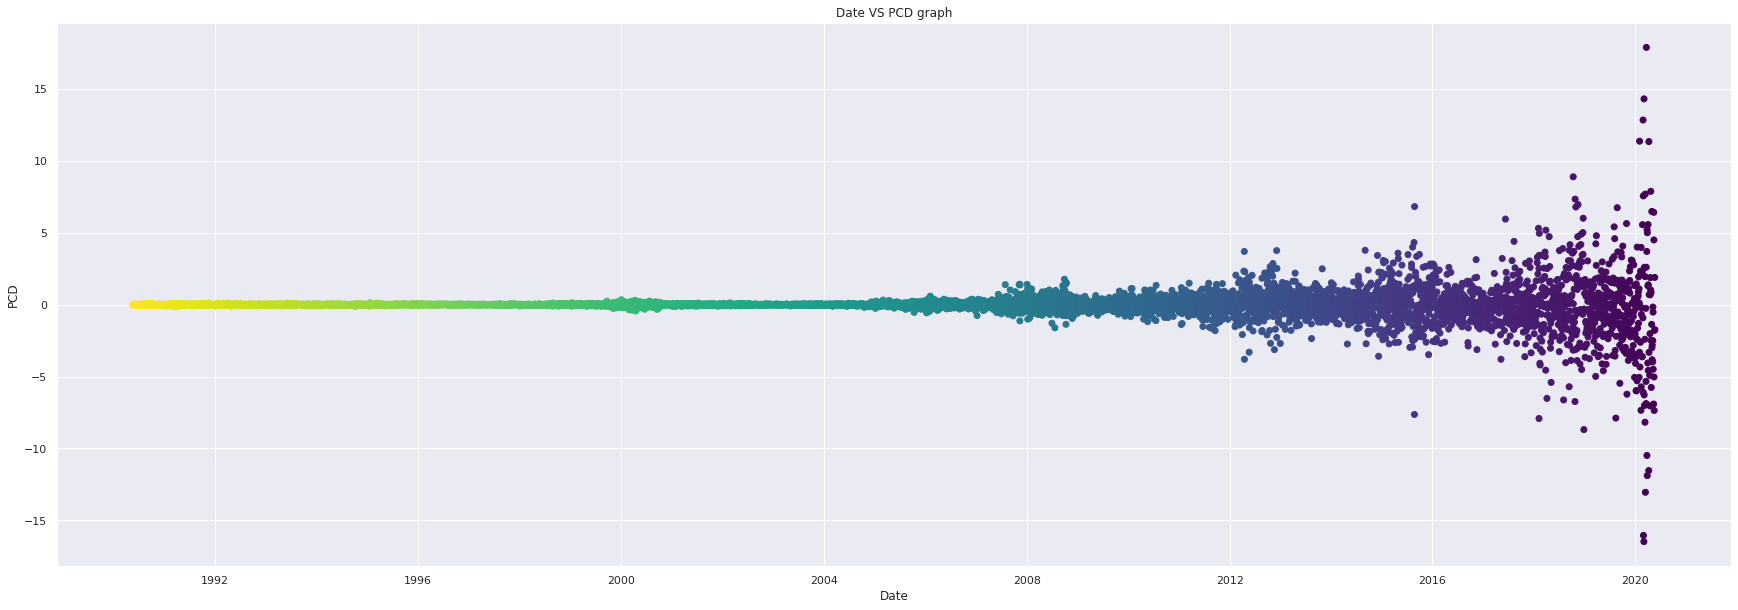

In [0]:
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', None)

#price change per day
pcd = hist['Open'] - hist['Close']

# print(pcd)  #printing out price change per day just becuz.
hist['PCD'] = pcd #Storing vaules in a new 'PCD' column


years = pd.DatetimeIndex(hist['Date']).year #Getting years from the datetime index from the timeseries data
hist['YEAR'] = years

months = pd.DatetimeIndex(hist['Date']).month #Getting months from the datetime index from the timeseries data
hist['MONTH'] = months

#Getting min and max year for x axis
min_year = np.amin(np.asarray(hist['YEAR']))
max_year = np.amax(np.asarray(hist['YEAR']))

#Plotting the PCD against YEAR
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.scatter(hist['YEAR'], hist['PCD'], c=hist['YEAR'], cmap='viridis_r')
plt.xlabel('YEAR')
plt.ylabel('PCD')
plt.title('YEAR VS PCD graph')
plt.show()

#Plotting the PCD against MONTH
sorted_hist = hist.copy()
sorted_hist.sort_values(by='MONTH', inplace=True)
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.scatter(sorted_hist['MONTH'], sorted_hist['PCD'], c=sorted_hist['MONTH'], cmap='viridis')
plt.title('MONTH VS PCD graph')
plt.xlabel('MONTH')
plt.ylabel('PCD')
plt.show()

#Plotting the PCD against Date
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.scatter(hist['Date'], hist['PCD'], c=hist['Date'], cmap='viridis_r')
plt.title('Date VS PCD graph')
plt.xlabel('Date')
plt.ylabel('PCD')
plt.show()



### **Observation:**

We observed that the stock prices are going up as we go further in time but in the scattered plot of PCD vs YEARS, we also see the volatility in the stock prices has also gone up significantly. We can see that most of the data points for every year are very close to 0, but since the year 2008, the PCD shoots up really fast!.

### **Observation:**

We can see that, the month of february, march, and april has been been pretty volatile, and this could be because of the **Global Stock Crisis** caused by the COVID-19 pandemics

## **Observation:**   Important observations 

**Note 1:** In the first figure, is that the volatility of the stock prices is increasing wrt years. As we further in years, we may notice even more volatility(fluctuation) in the stock prices!

Now, one might share an opinion that volatile stock prices is not a sign of a good stock, but another might share a different opinion!, that although high risk associated to volatility, the return might be very high depending on when the stock is purchased and sold. 

**Note 2:** In the second figure, we can observe that the volatility is really high during first 4 months of the year, and kind of stabilizes a little for rest of the months of the year. And, we know this pattern continues for every year, since our figure is a result of aggregating 30 years worth of data.

**Note 3:** In the third figure, we can observe occasional spikes in the volatility, but we can still see there is an increasing trend in the volatility as suggested by Note 1.

### **Experiment:**

Lets see if there is a month that has better PCD on average every year!!

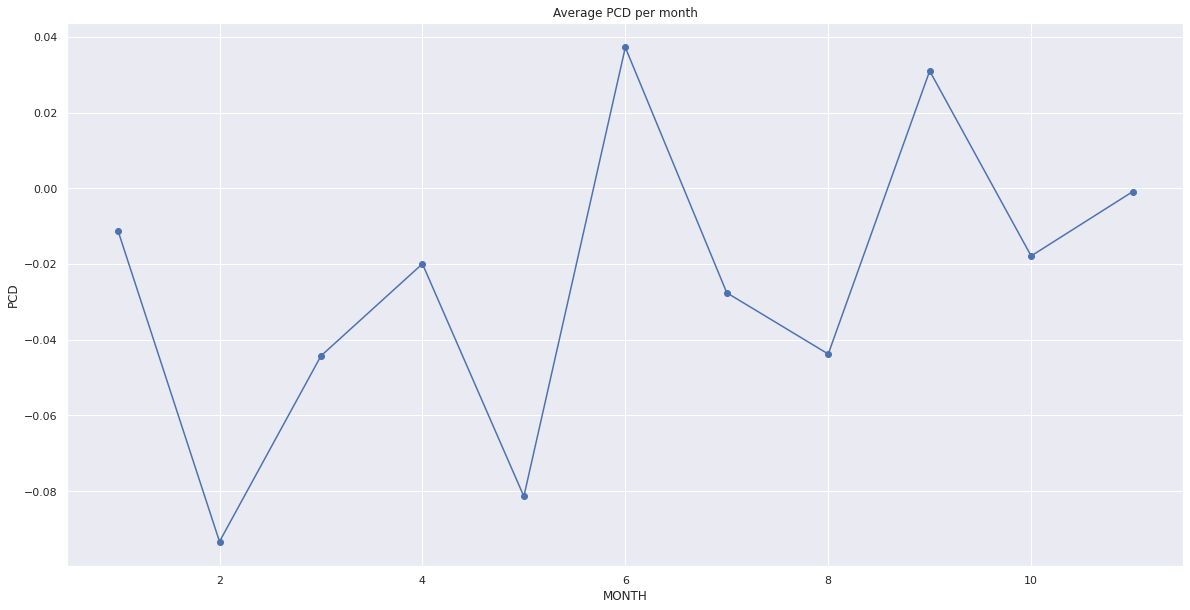

In [0]:
def get_avg_PCD_Month(df):
  new_hist = df.copy()
  sorted_hist = new_hist.sort_values(by='MONTH')
  sorted_hist.reset_index(drop=True, inplace=True) #resets the index to start with the new ordered position


  average_PCD_per_MONTH = []
  PCD_MONTLY = []
  starting_month = 1

  for i in range(sorted_hist.shape[0]):
    # print(sorted_hist.loc[i]['MONTH'])
    if (sorted_hist.loc[i]['MONTH'] == starting_month):
      PCD_MONTLY.append(sorted_hist.loc[i]['PCD'])
    else:
      average_PCD_per_MONTH.append(np.mean(np.array(PCD_MONTLY)))
      starting_month = sorted_hist.loc[i]['MONTH']
      PCD_MONTLY = []
      PCD_MONTLY.append(sorted_hist.loc[i]['PCD'])


  # print(average_PCD_per_MONTH)

  plt.figure(figsize=(20, 10))
  plt.plot(range(1, 12), average_PCD_per_MONTH, 'bo-')
  plt.title('Average PCD per month')
  plt.xlabel('MONTH')
  plt.ylabel('PCD')
  plt.show()

get_avg_PCD_Month(hist)

### **Observation:**

We see that, the month of jan, feb, march, april, may, july and august has a negative average PCD with february having the lowest average. The month of june has the highest average PCD. Ofcourse, this figure is not a 100 percent accurate because a single large PCD can significantly affect the average PCD.

### **Experiment:**
This calls for elimination removal of the significantly large PCDs that we noticed so that we can reduce their effects that can potentially drive the overall average PCD for that month up or down.


# **Isolation Forest Technique**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning:

'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.2s remaining:    3.3s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.2s finished


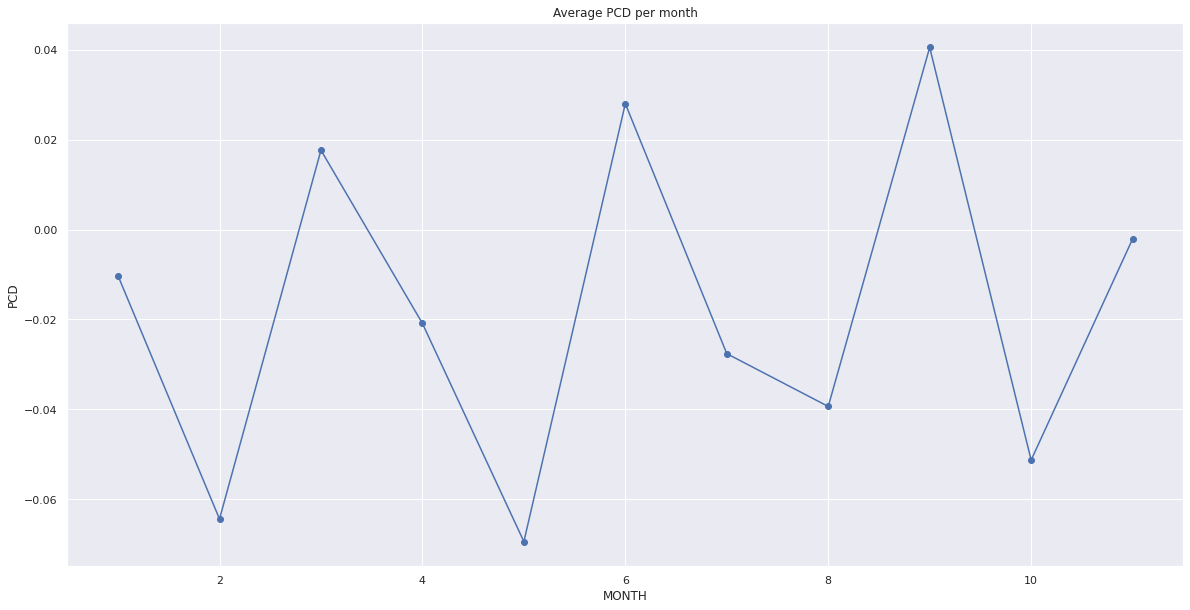

In [0]:
from sklearn.ensemble import IsolationForest

isolated_hist = hist.copy()

X = isolated_hist[['PCD']]

iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1,
                             max_features=1.0, bootstrap=False, verbose=1, n_jobs=-1, random_state=42, behaviour='new')

iso_forest.fit(X)

#  Predict the outlier: 1 for an inlier and -1 for an outlier
X_prediction = iso_forest.predict(X)

#  Getting the anamoly score for the outliers in X
X_anamoly_score = iso_forest.decision_function(X)

# Create a dictionary of the anamoly score values
X_anamoly_score_dict = {}

# For each anamoly score value, add an index starting from 0 to correspond to the actual data indices
for i in range(len(X_anamoly_score)):
  X_anamoly_score_dict[i] = X_anamoly_score[i]

# Sort the anamoly score values in their increasing order
sorted_X_anamoly_score_dict = {k: v for k, v in sorted(X_anamoly_score_dict.items(), key=lambda item: item[1])}

# Get the indices of the data points for the sorted anamoly score values 
sorted_X_anamoly_score_dict_keys =  sorted_X_anamoly_score_dict.keys()

# print(sorted_X_anamoly_score_dict)

#remove the top 50 outliers from the sorted_hist data
for i in range(50):
  key = list(sorted_X_anamoly_score_dict_keys)[i]
  # print('\n Outlier Rank: {} \n PCD: {}'.format(i+1, X.iloc[key]))
  isolated_hist.drop([key], inplace=True)

get_avg_PCD_Month(isolated_hist)

### **Observation:**

It seems like, our experiment was a success since we proved that there were significantly large or small PCDs as Outliers that affected the average per month. Now, we have a graph of average PCD per month almost completely unaffected by the significant outliers.

**Note:** We notice that, the frequency of negative average PCD per month has increased. We also notice that the highest average PCD per month is now in September!!. This is great, because in September is when APPLE launches their new Iphones which is expected to cause growth in their stock prices and the PCDs.

**Hypothesis:** Funny enough, we notice that there is a sharp decline in average PCD in october. One hypothesis is that people buy APPL stock in september thinking the launch of new Iphones will shoot up the stock prices which in turn does increase the stock prices and the PCD goes up, but immediately after that there is a trend every year of decline in stock prices(could be because of a number of different reasons. out of context here!!) which cause the average PCD to fall down significantly.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### **Finding optimal number of clusters**

### 1.   **Elbow Curve** method



In [0]:
X1 = hist[['PCD']]  #Feature set with PCD 

kmeans_per_k_X1 = [KMeans(n_clusters=k, random_state=43).fit(X1) 
                for k in range(1,25)]

inertias_X1 = [model.inertia_ for model in kmeans_per_k_X1] #inertias for all models in kmeans_per_k_X1

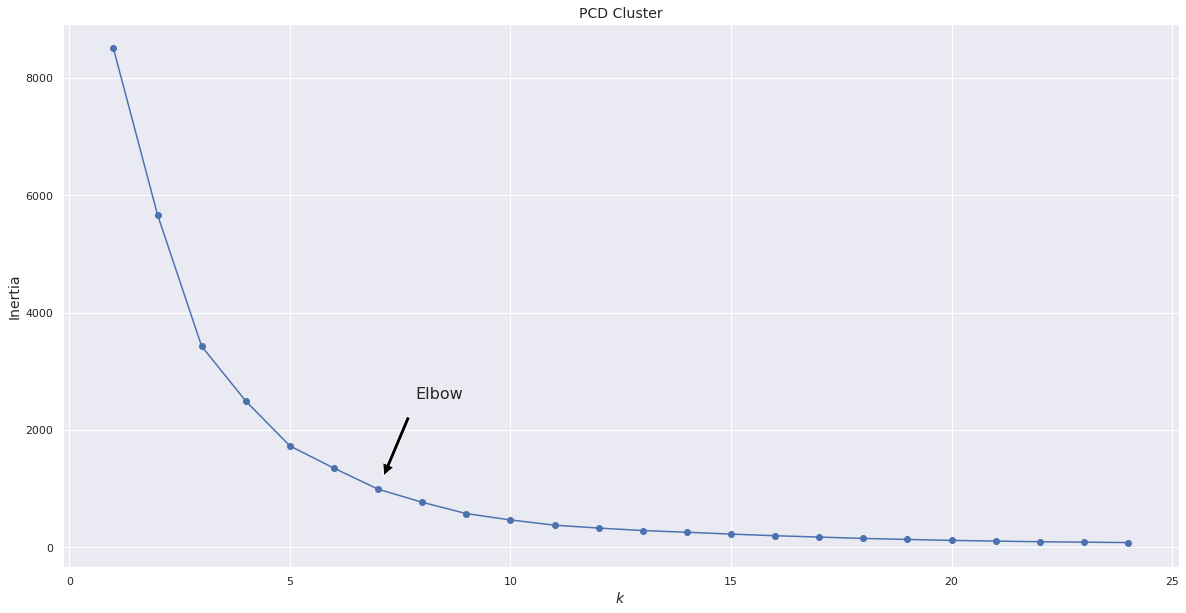

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 25), inertias_X1, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('PCD Cluster', fontsize=14)
plt.annotate('Elbow',
             xy=(7, inertias_X1[6]),
             xytext=(0.35, 0.35),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.15)
            )
plt.show()

### **Observation**
We see that there is an elbow at $k=7$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half.

So $k=7$ is a pretty good choice.

### **2.    Silhouette score vs 𝑘**

The silhouette coefficient can vary between -1 and +1:

*   A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters.
*   A coefficient close to 0 means that it is close to a cluster boundary.
*   A coefficient close to -1 means that the instance may have been assigned to the wrong cluster.




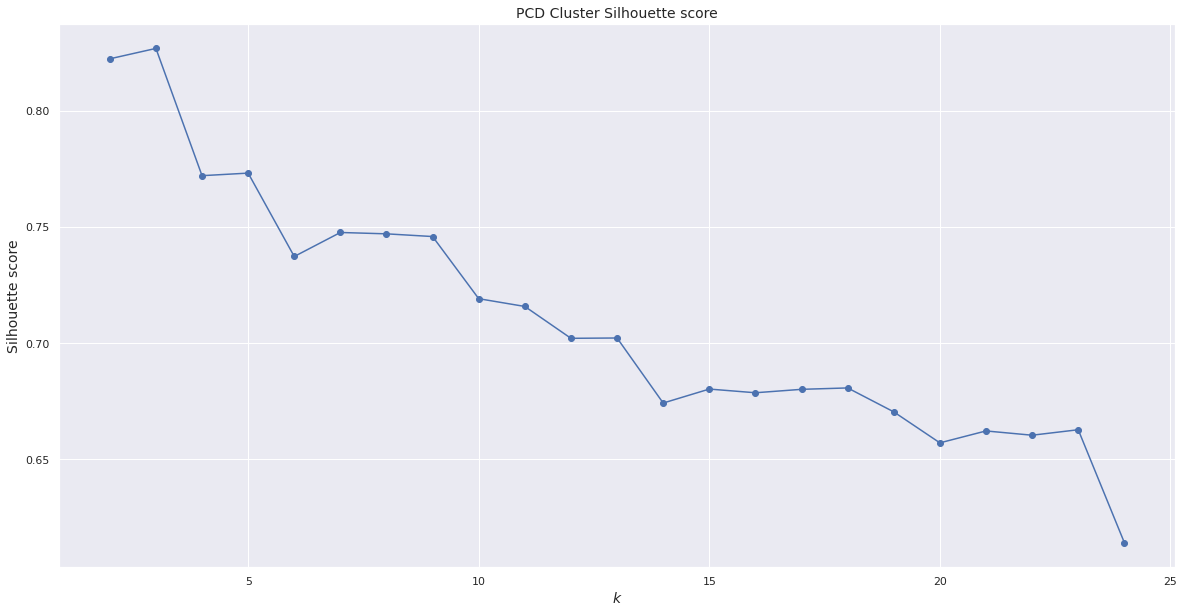

In [0]:
#Feature set PCD
silhouette_scores_X1 = [silhouette_score(X1, model.labels_) 
                      for model in kmeans_per_k_X1[1:]]    #silhouette scores for models in kmeans_per_k starting at index=1

plt.figure(figsize=(20, 10))
plt.title('PCD Cluster Silhouette score', fontsize=14)
plt.plot(range(2, 25), silhouette_scores_X1, 'bo-')  #setting the range for plot equal to the range used for kmeans.
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

## **Observation**

This visualization is very clear: However it doesn't confirm that $k$ = 7 is a good choice since silhouette score goes down continuously. This basically shows the more the clusters we have the lower the silhouetter score for that many cluster we get. Therefore we still can't be sure of optimal $k$ until we look at the Silhouette Diagram.

## **3. Silhouette Diagram** 

An even more informative visualization is given when we plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.

This is called a silhouette diagram.

Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

### **Note:**
Since we got an elbow curve at $k$ = 7, we will select that optimal $k$ with a range from $k$=5 to $k$ = 19 to find the best optimal $k$.

In [0]:
def silhouette_diagram(kmeans_per_k, X, silhouette_scores):
  plt.figure(figsize=(30,50))

  for k in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
    plt.subplot(4, 3, k - 14)

    y_pred = kmeans_per_k[k - 1].labels_ # using k - 1 because its a list and k = 3 is in 3-1 = 2nd position in the list.
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X)
    pos = padding
    ticks = []

    for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      color = mpl.cm.Dark2(i / k)
      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0 , coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ticks.append(pos + len(coeffs))
      pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (15, 25):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")

    if k in (15, 16, 17):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")
      
    if k in (18, 19, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")

    if k in (21, 22, 23):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")
    
    if k == 24:
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")
      plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

  plt.show()


## &emsp;&emsp;&emsp;&emsp; **Silhouette diagram for PCD clusters**


---



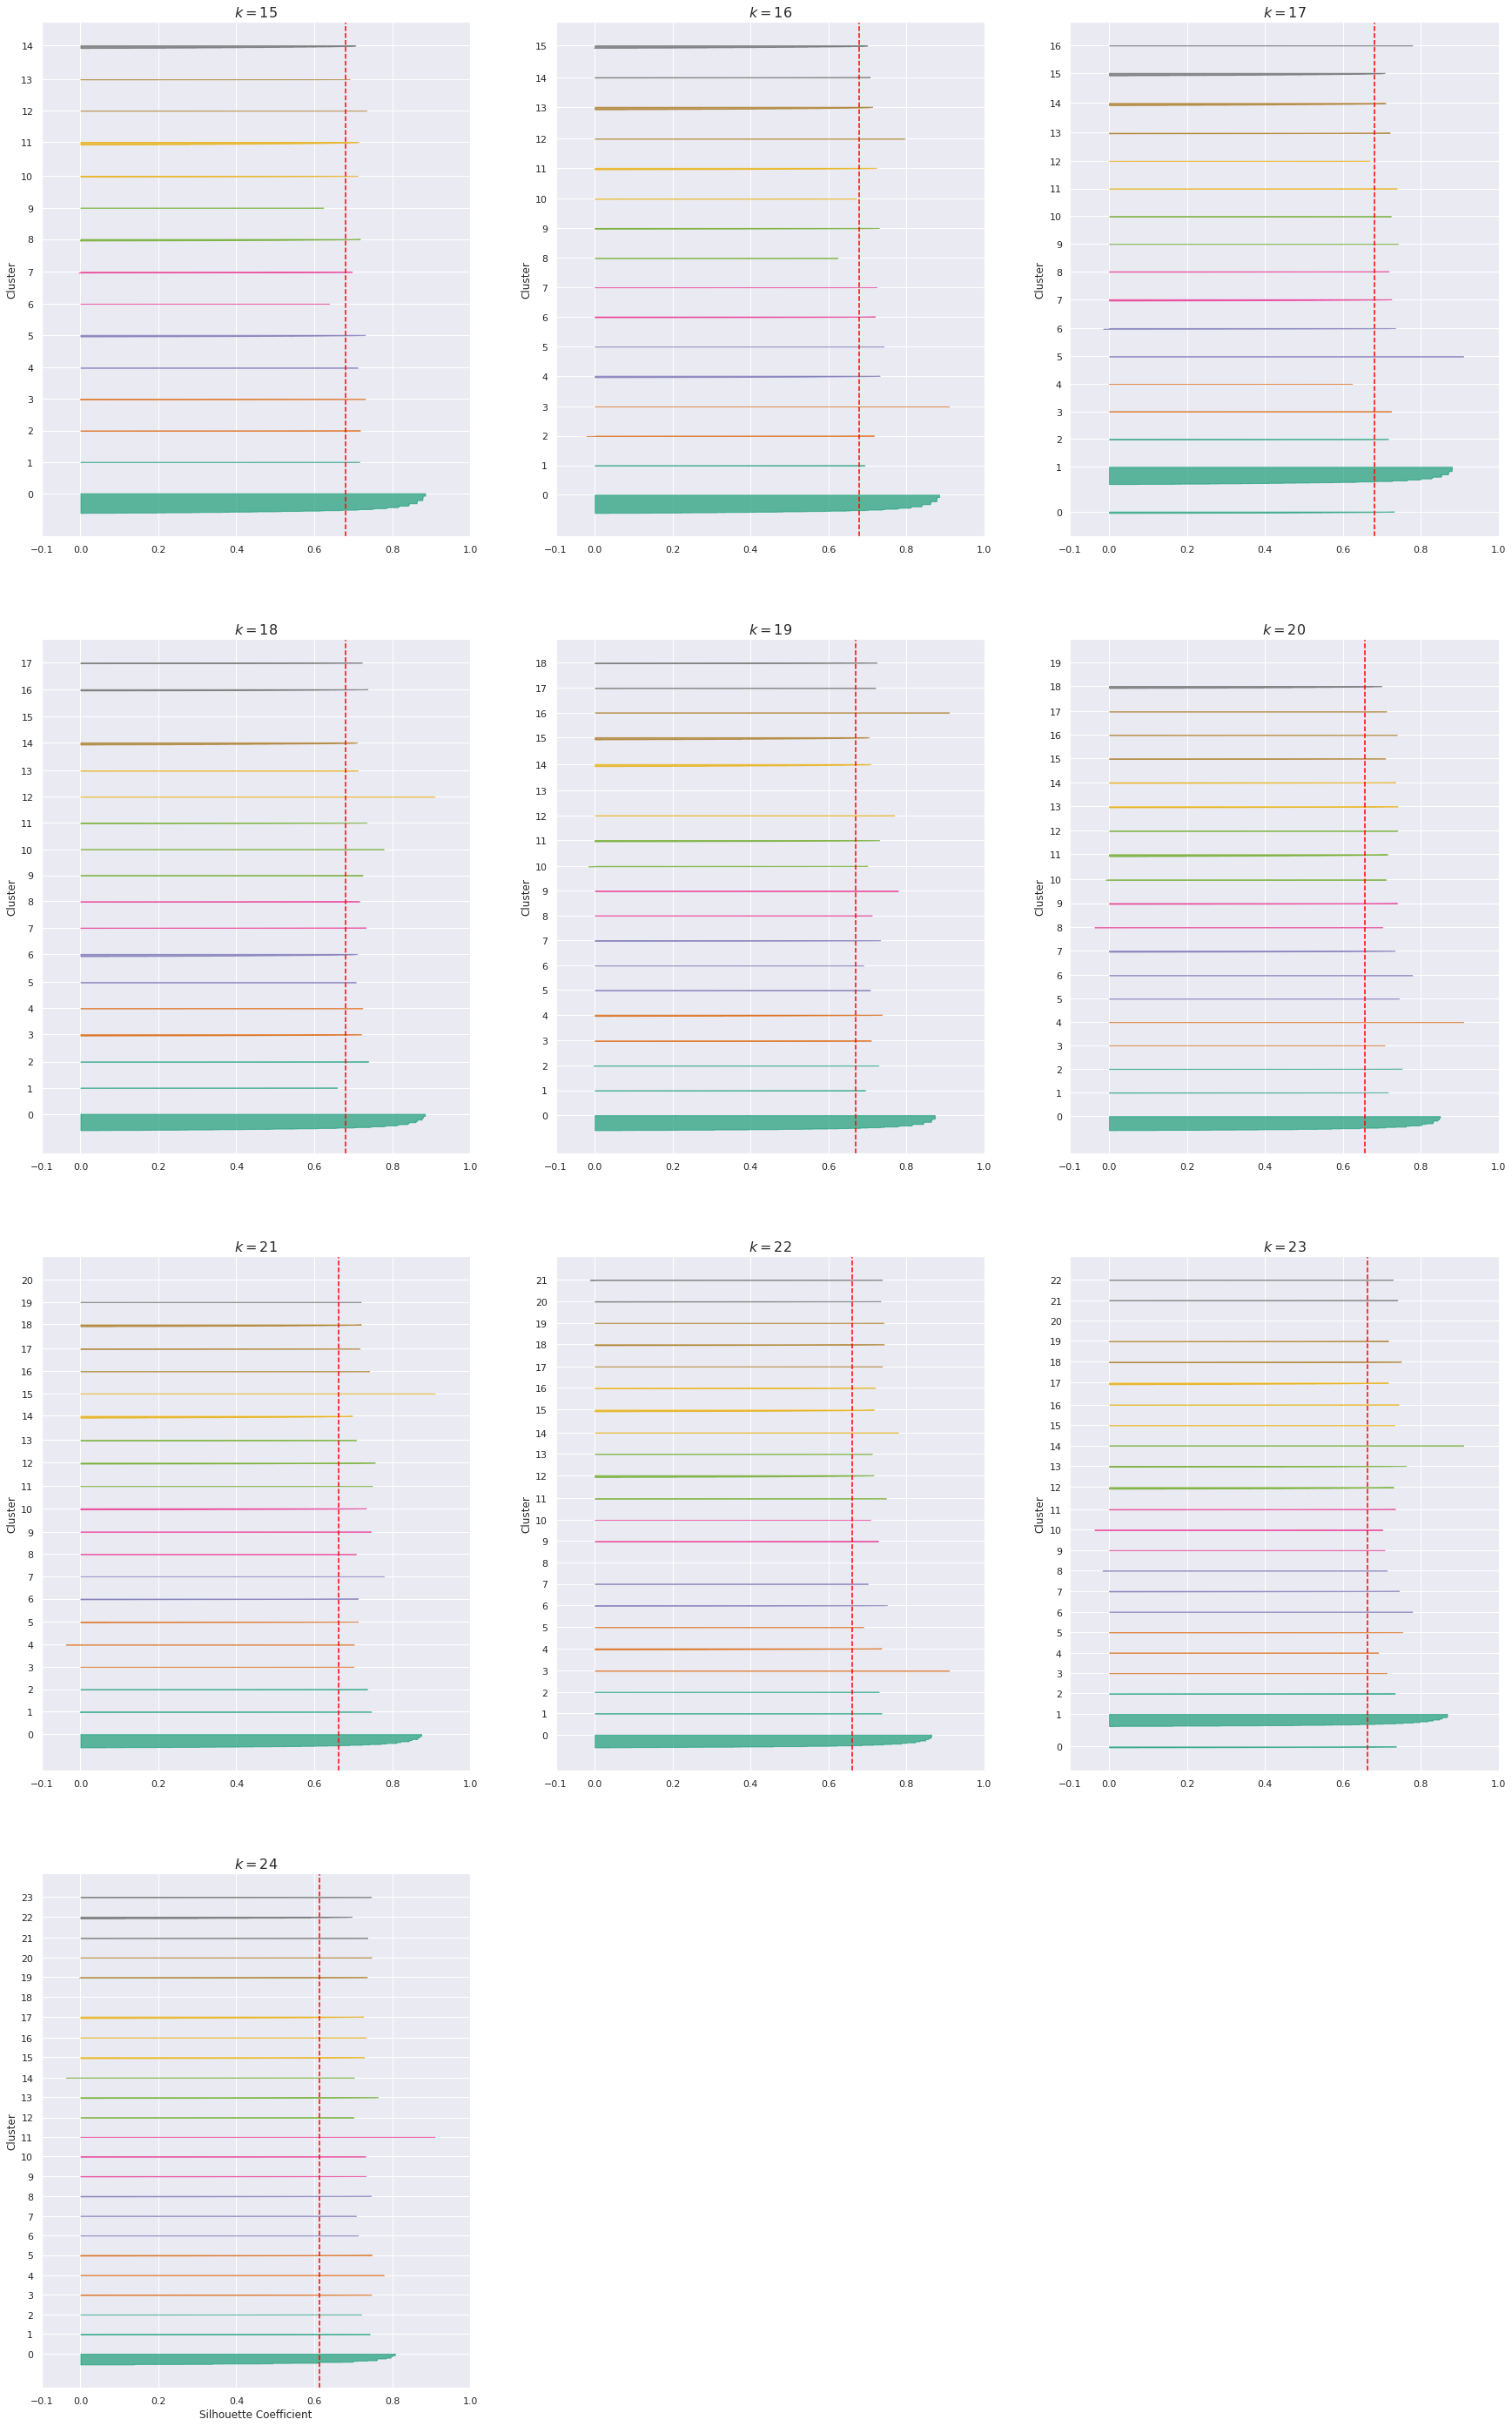

In [0]:
silhouette_diagram(kmeans_per_k_X1, X1, silhouette_scores_X1)

### **Observation: Silhouette Diagram**
The vertical dashed lines represent the silhouette score for each number of clusters.

**When $k$=5 to $k$=10**, most of the instances in a cluster have a lower coefficients.(i.e. many of the instances stop short of the dashed line, ending to the left of it), which implies the cluster is rather bad since this means its instances are much too close to other clusters. Starting at  𝑘  = 15 to  𝑘  = 18, some clusters still fall behind the dashed line. 

**However**: Starting at $k$ = 19 to $k$= 24, all of the instances extend upto or beyond the dashed line, to the right and closer to 1.0.

**Therefore**, we can safely  say that starting **at $k$ = 19** would the lowest number of clusters present in the given data! 




## **4. BIC & AIC**

With K-Means, we could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are **not spherical or have different sizes**.

Instead, we can try to find the model that minimizes a **theoretical information criterion**, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).

In [0]:
from sklearn.mixture import GaussianMixture

def bic_aic(X):
  #perfoming GMM clustering for k in range 1 to 25
  gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 25)]

  bics = [model.bic(X) for model in gms_per_k]
  aics = [model.aic(X) for model in gms_per_k]

  plt.figure(figsize=(20, 15))
  plt.plot(range(1, 25), bics, 'bo-', label='BIC')
  plt.plot(range(1, 25), aics, 'go--', label='AIC')
  plt.xlabel('Clusters')
  plt.title('ACI & BIC graph')
  plt.legend()
  plt.show()

  #finding optimal k
  min_bic = np.infty

  for k in range(1, 25):
    if bics[k-1] < min_bic:
      min_bic = bics[k-1]
      best_k = k

  print('\nOptimal k: {}'.format(best_k))

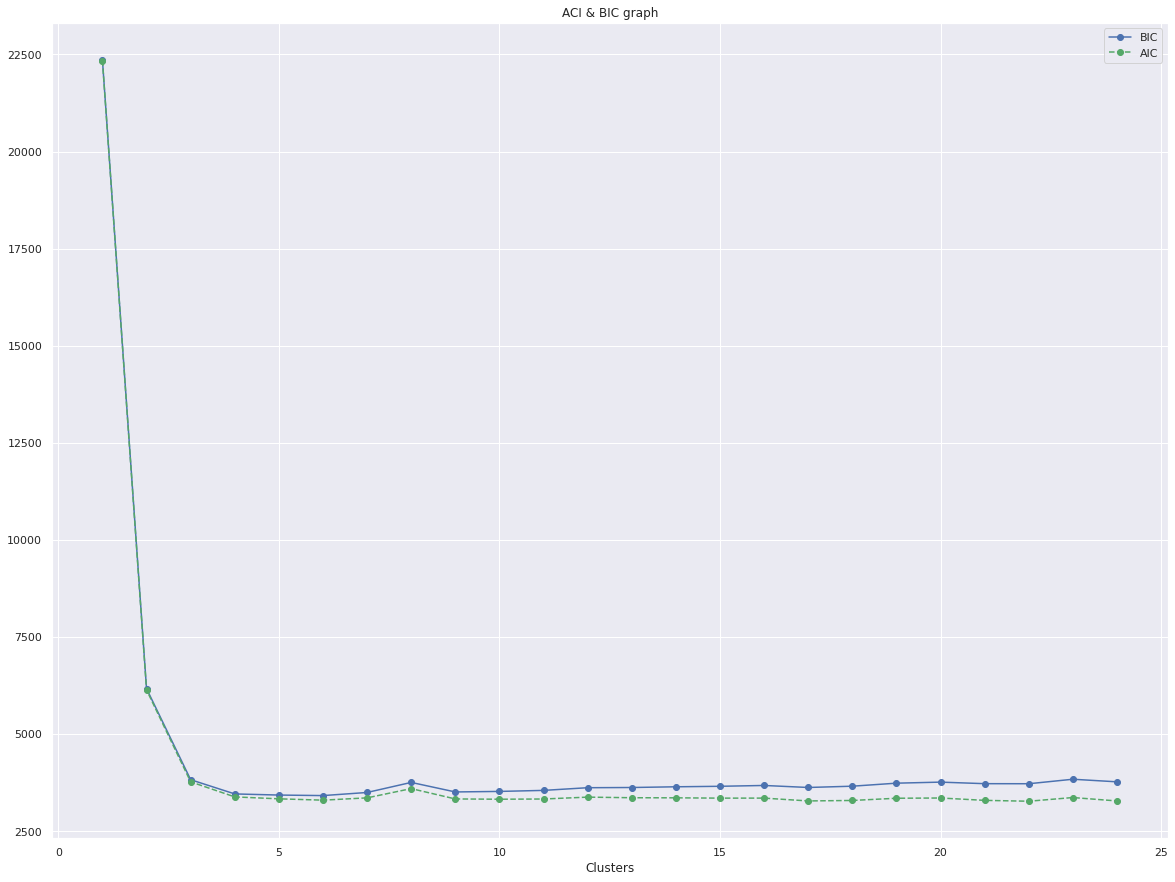


Optimal k: 6


In [0]:
bic_aic(X1) #getting BIC_AIC diagram for X1

### **Observation:**

Notice, that in the figure, the bic is gradually increassing starting at $k$ = 6 !!! The more we increase the number of clusters, the bigger bic score is obtained. We get the lowest bic at $k$= 6 **therefore** the **optimal $k$ = 6.**

**Note:** The optimal $k$ obtained here is vastly different from what we got in silhouette diagram i.e. $k$= 19. 

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**KMEANS**

---



In [0]:
def Kmeans_Clustering(X, col, k):
  kmeans = KMeans(k, random_state=42)
  kmeans.fit(X)
  # X_new = kmeans.fit_transform(X) #Transforming X to cluster-distance space to make the clusters even more visible
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_

  plt.figure(figsize=(25, 15))
  plt.scatter(col, X, c=labels, cmap='nipy_spectral_r')
  plt.xlabel('MONTH')
  plt.ylabel('PCD')
  plt.title('For Optimal k: {}'.format(k))

  plt.show()


### Feature set YEAR & PCD

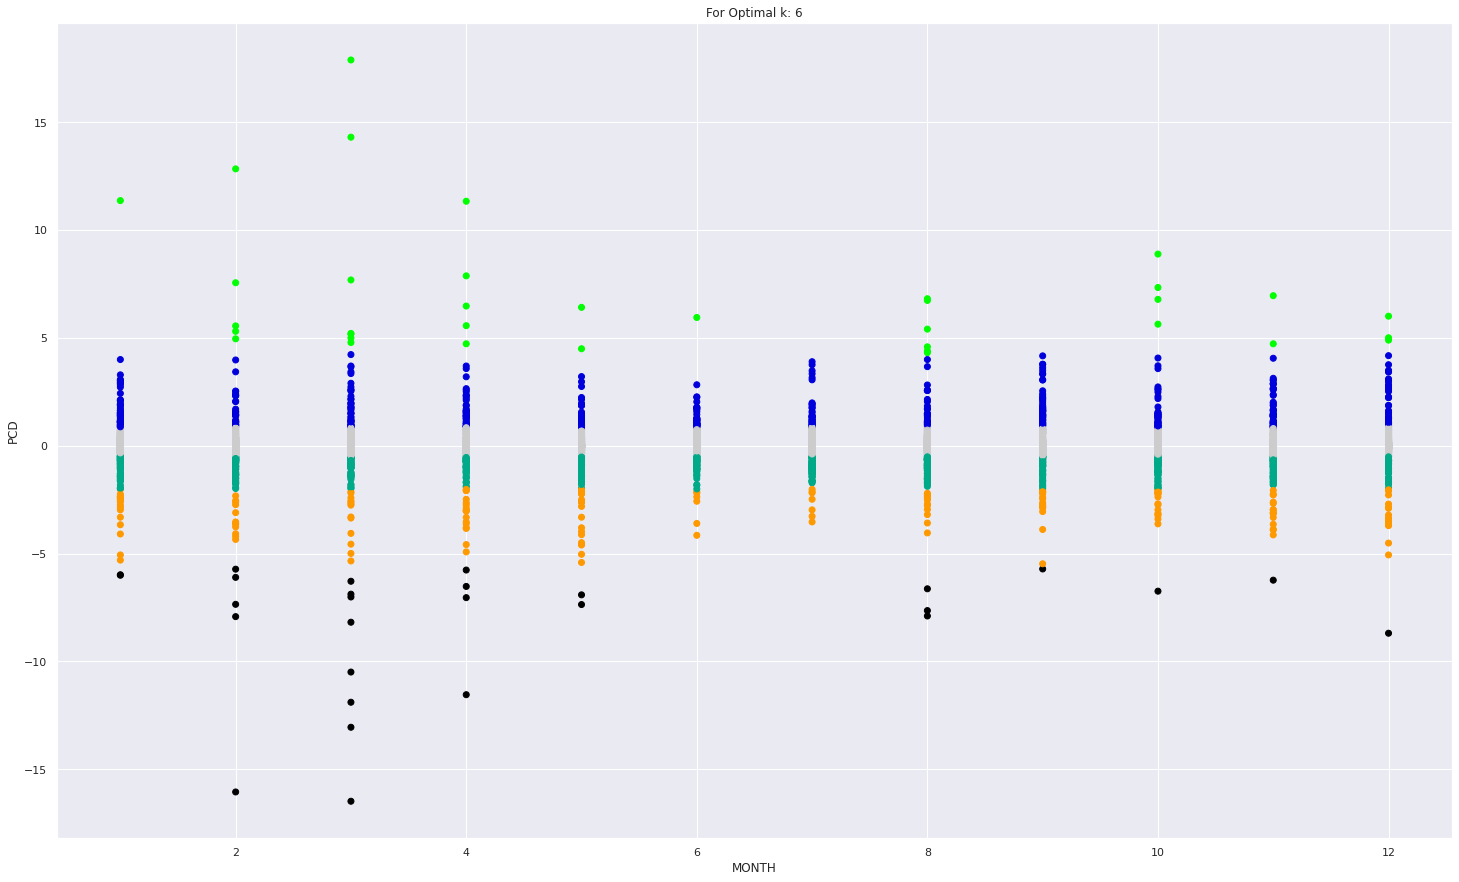

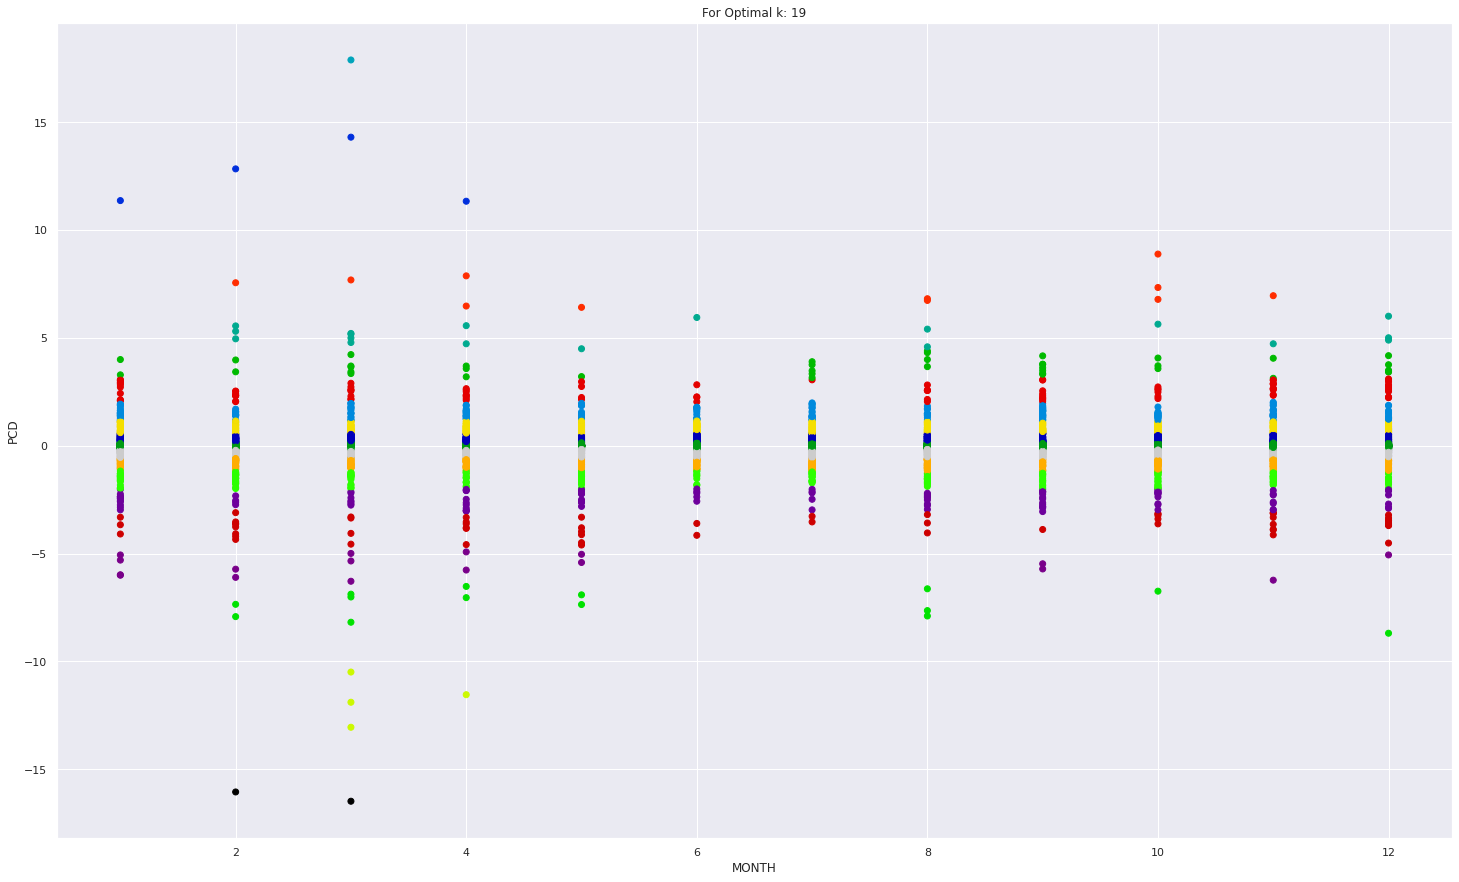

In [0]:
Kmeans_Clustering(X1, hist['MONTH'], k=6)
Kmeans_Clustering(X1, hist['MONTH'], k=19)

### **Observation**
At $k$ = 6, we see that there were little to none distinction between various datapoints because the cluster size were big. At $k$ = 19, however we get to see that, there a lot of distinctions in the cluster. For exampl:- The cluster in color blue represents all the datapoints that have PCD in between \$$10 - \$$15. Similarly, the cluster in color grey represents all the datapoint with very little PCD close to $0.0. 

For the most part, we see a very similar PCD for all of the months with some exception in the first few months as seen from the cluster in blue for positive PCD and black for negative PCDs. And as explained above, these execeptions could have been the result of the COVID-19 crisis.

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**RESULT**

---



From the figure average PCD per month obtained after isolating the anamolies caused by COVID crisis, we can conclude that the best time to buy APPL stocks is the month of May when APPL stocks have a history of hitting their lowest yearly stock price and the best time to sell those stocks would be in the month of Septemeber (Usually when apple announces their new Iphones). 

Obviously, this doesn't predict how well APPL stocks might perform in future, as all we are looking at is the APPL historical stock price data in some form of visualization. 